In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df=pd.read_csv("/content/mlb_ML.csv")
df.head(3)

,Year,Tm,HR,BB,SO,OPS,W-L%,ERA,H9,HR9,SO9,SO/W
0,2004,Arizona Diamondbacks,135,441,1022,0.703,0.315,4.98,9.3,1.2,7.2,1.73
1,2004,Atlanta Braves,178,587,1158,0.777,0.593,3.74,9.2,1.0,6.4,1.96
2,2004,Chicago Cubs,235,489,1080,0.786,0.549,3.81,8.4,1.0,8.3,2.47


In [52]:
sns.set_style('darkgrid')

In [53]:
df.shape

(600, 12)

In [54]:
df.isnull().sum()

Year    0
Tm      0
HR      0
BB      0
SO      0
OPS     0
W-L%    0
ERA     0
H9      0
HR9     0
SO9     0
SO/W    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    600 non-null    int64  
 1   Tm      600 non-null    object 
 2   HR      600 non-null    int64  
 3   BB      600 non-null    int64  
 4   SO      600 non-null    int64  
 5   OPS     600 non-null    float64
 6   W-L%    600 non-null    float64
 7   ERA     600 non-null    float64
 8   H9      600 non-null    float64
 9   HR9     600 non-null    float64
 10  SO9     600 non-null    float64
 11  SO/W    600 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 56.4+ KB


In [56]:
df.describe()

,Year,HR,BB,SO,OPS,W-L%,ERA,H9,HR9,SO9,SO/W
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2013.500000,169.988333,499.343333,1188.516667,0.736112,0.499987,4.206117,8.797833,1.102833,7.700167,2.428183
std,5.771093,42.901738,94.172233,226.211271,0.038579,0.074643,0.539660,0.649267,0.200105,1.067903,0.483205
min,2004.000000,51.000000,147.000000,440.000000,0.626000,0.290000,2.800000,6.900000,0.600000,5.600000,1.340000
25%,2008.750000,143.750000,456.750000,1075.750000,0.708000,0.444000,3.810000,8.400000,1.000000,6.900000,2.110000
50%,2013.500000,170.000000,509.500000,1213.000000,0.736000,0.500000,4.160000,8.800000,1.100000,7.600000,2.365000
75%,2018.250000,199.000000,557.000000,1338.250000,0.762000,0.556000,4.580000,9.200000,1.200000,8.500000,2.720000
max,2023.000000,307.000000,705.000000,1654.000000,0.848000,0.717000,5.840000,10.400000,1.900000,11.000000,3.980000


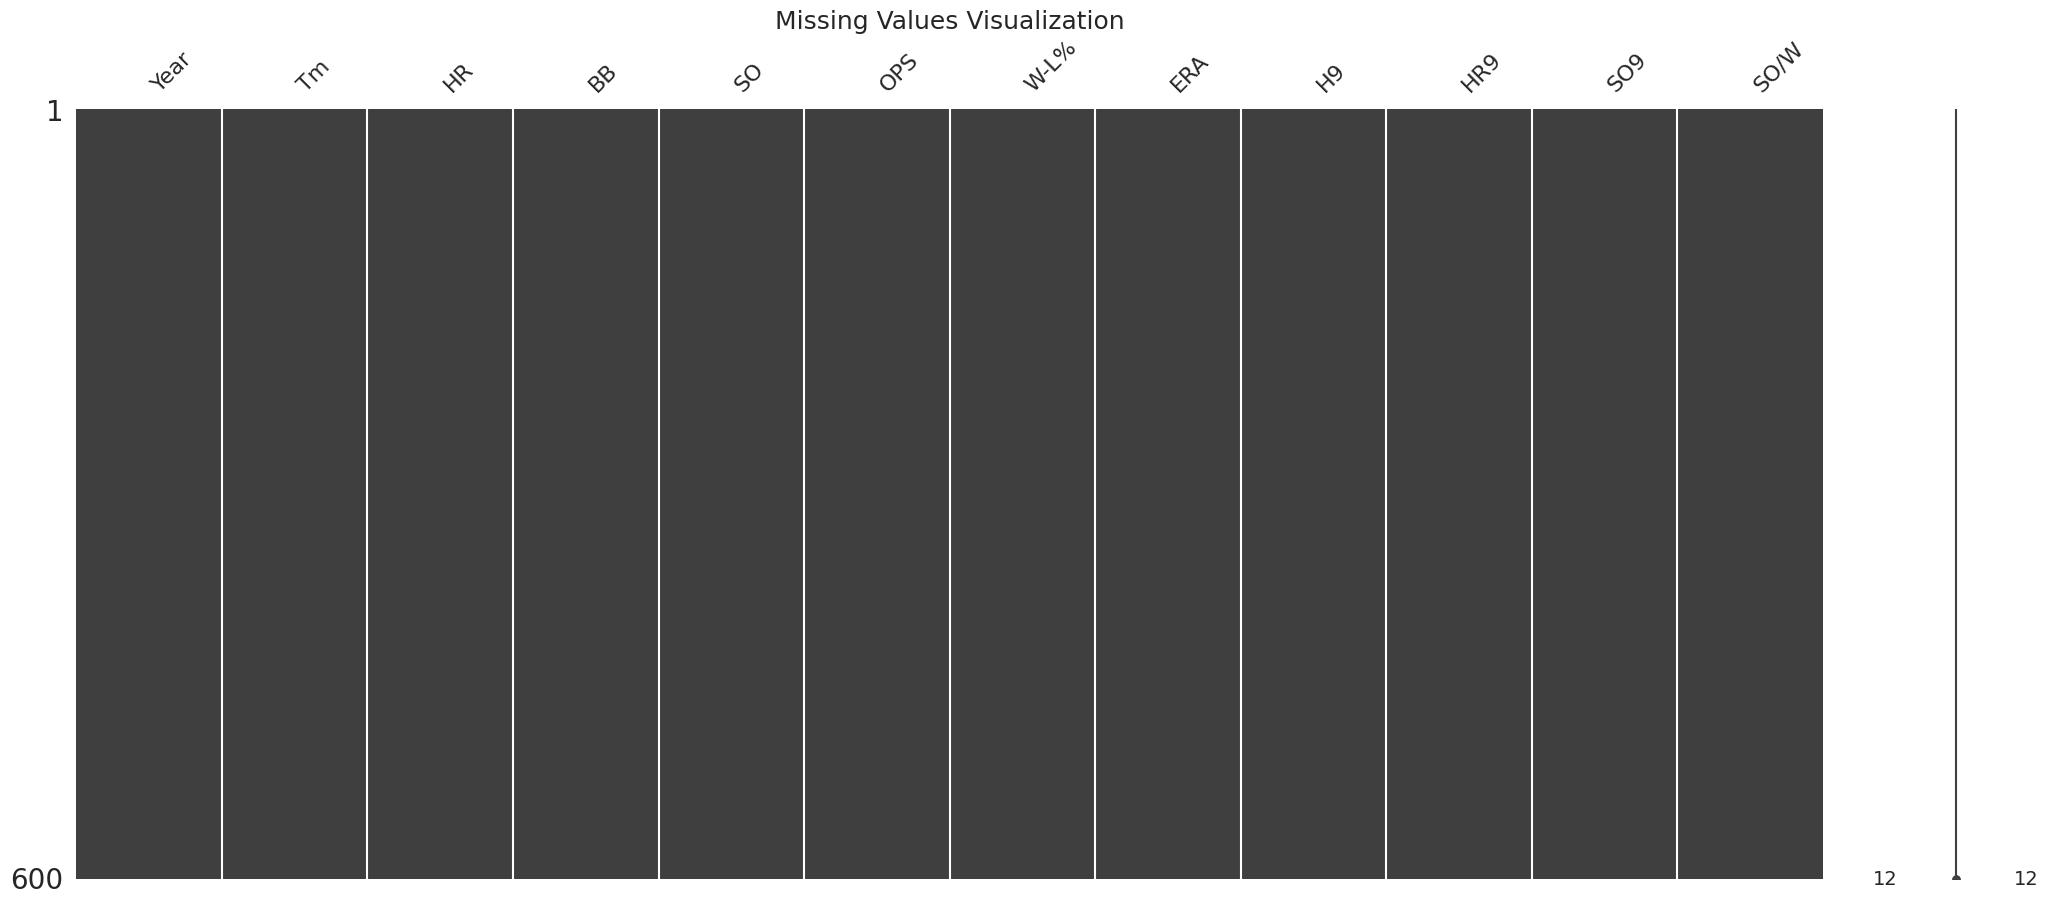

No missing values found in the dataset.


In [57]:
!pip install missingno

import missingno as msno

# 결측치 시각화
msno.matrix(df)
plt.title('Missing Values Visualization')
plt.show()

# 변수별 결측치 비율 계산
missing_ratio = df.isnull().sum() / len(df) * 100
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)

# 결측치 비율 시각화
if len(missing_ratio) > 0:
    plt.figure(figsize=(10, 6))
    plt.title('Missing Values Ratio')
    missing_ratio.plot(kind='bar')
    plt.xlabel('Variables')
    plt.ylabel('Missing Ratio (%)')
    plt.show()
else:
    print('No missing values found in the dataset.')

In [58]:
df['W-L%'].describe()

count    600.000000
mean       0.499987
std        0.074643
min        0.290000
25%        0.444000
50%        0.500000
75%        0.556000
max        0.717000
Name: W-L%, dtype: float64

<Axes: >

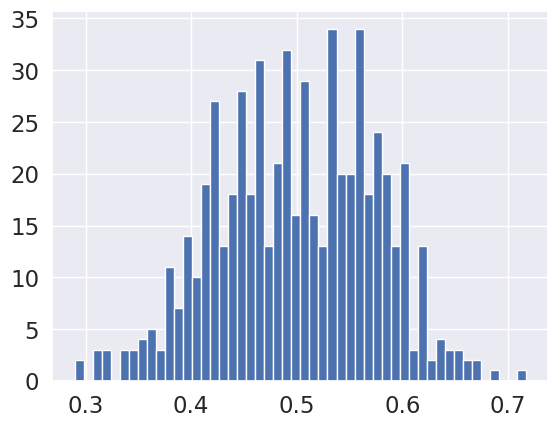

In [59]:
df['W-L%'].hist(bins=50)

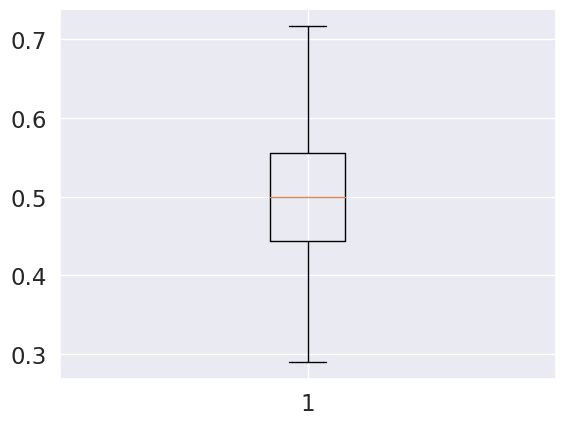

In [60]:
plt.boxplot(df['W-L%'])
plt.show()

In [61]:
# 공격 관련 변수
offensive_columns = ['OPS', 'HR', 'BB', 'SO']

# 투수 관련 변수
pitcher_columns = ['ERA', 'HR9', 'SO9', 'SO/W']


numerical_columns = offensive_columns + pitcher_columns

<ipython-input-62-683092d7c3e1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


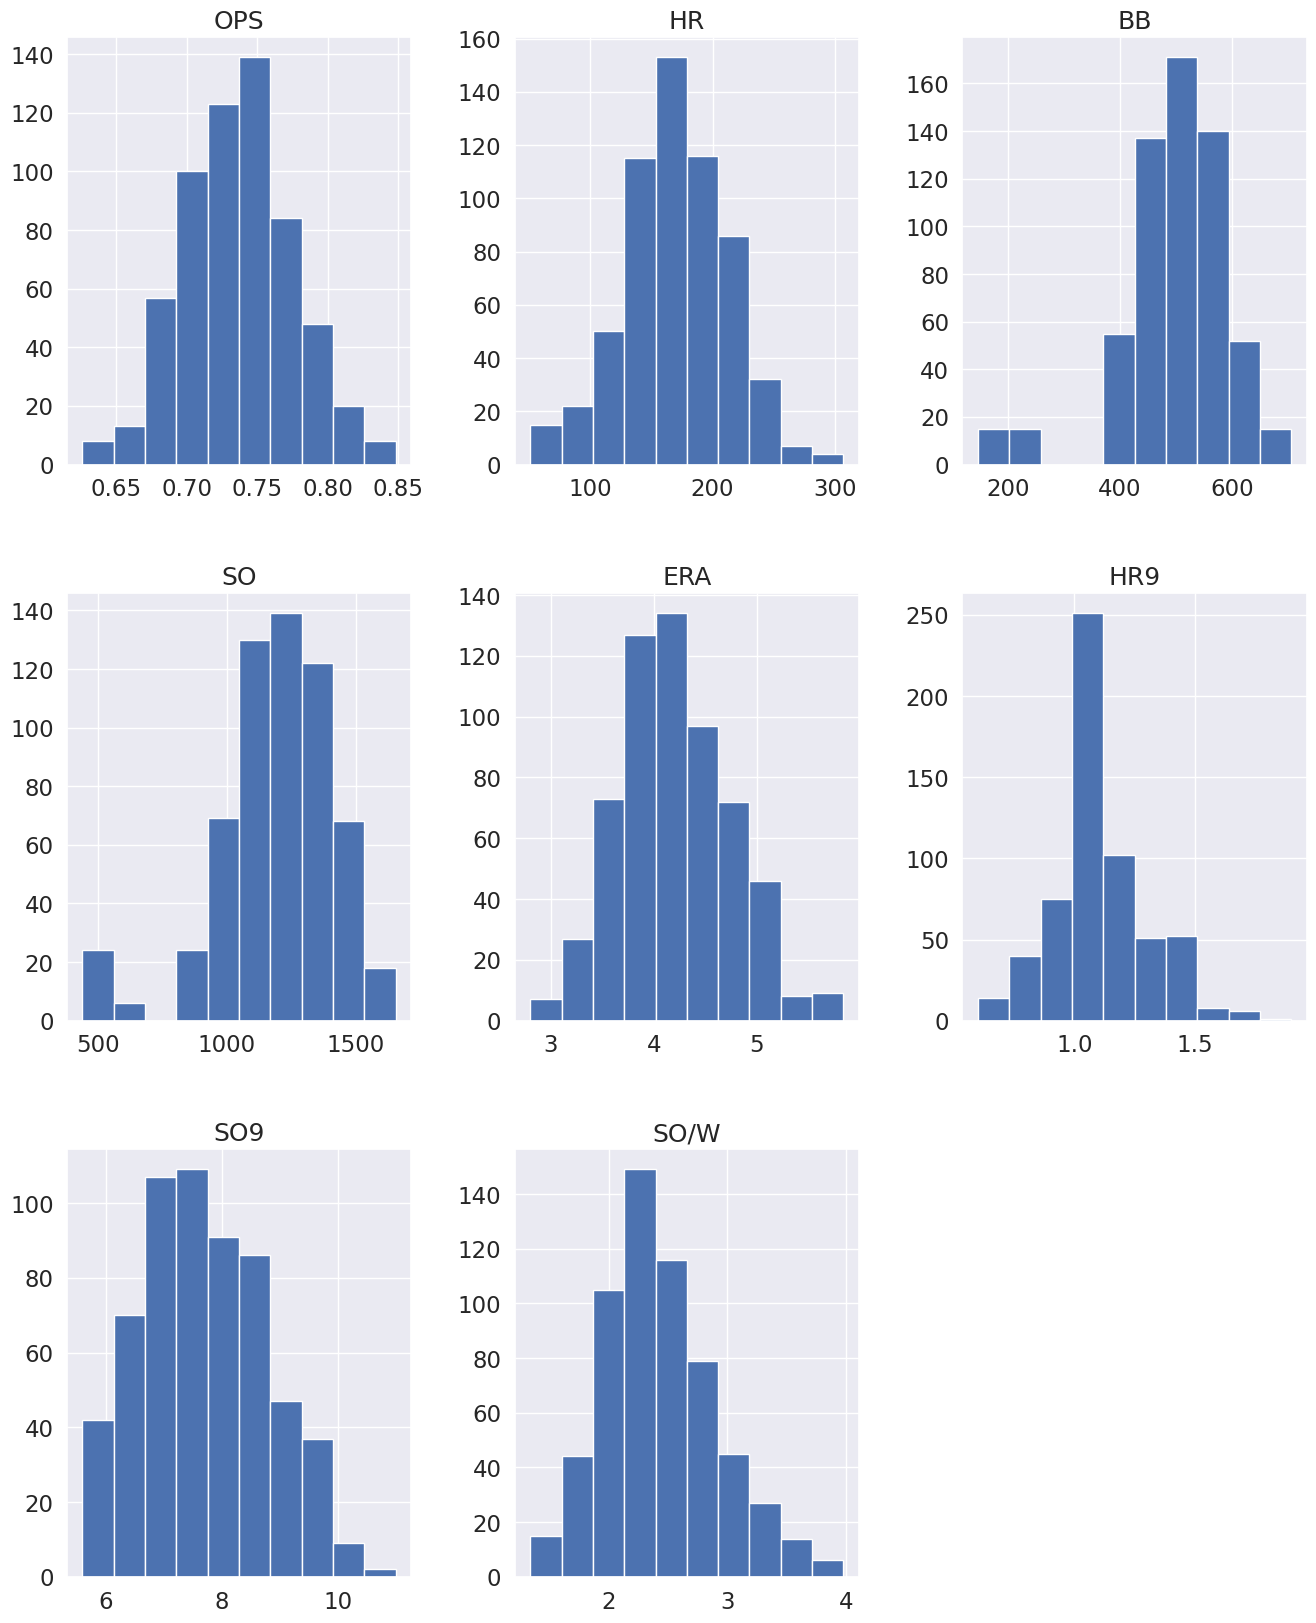

In [62]:
fig = plt.figure(figsize=(16, 20))
ax = fig.gca()
df[numerical_columns].hist(ax=ax)
plt.show()

In [63]:
cols = ['W-L%'] + numerical_columns
corr = df[cols].corr(method='pearson')
corr

,W-L%,OPS,HR,BB,SO,ERA,HR9,SO9,SO/W
W-L%,1.000000,0.546855,0.359843,0.317928,-0.081084,-0.699393,-0.366212,0.274047,0.532582
OPS,0.546855,1.000000,0.570068,0.358539,-0.169888,0.058474,0.104518,-0.019119,0.024916
HR,0.359843,0.570068,1.000000,0.603982,0.562314,-0.027392,0.169810,0.159774,0.201562
BB,0.317928,0.358539,0.603982,1.000000,0.512764,-0.187803,-0.227254,-0.145301,0.045505
SO,-0.081084,-0.169888,0.562314,0.512764,1.000000,-0.063272,0.040817,0.207589,0.205200
ERA,-0.699393,0.058474,-0.027392,-0.187803,-0.063272,1.000000,0.651209,-0.308724,-0.624486
HR9,-0.366212,0.104518,0.169810,-0.227254,0.040817,0.651209,1.000000,0.234057,-0.075311
SO9,0.274047,-0.019119,0.159774,-0.145301,0.207589,-0.308724,0.234057,1.000000,0.758859
SO/W,0.532582,0.024916,0.201562,0.045505,0.205200,-0.624486,-0.075311,0.758859,1.000000


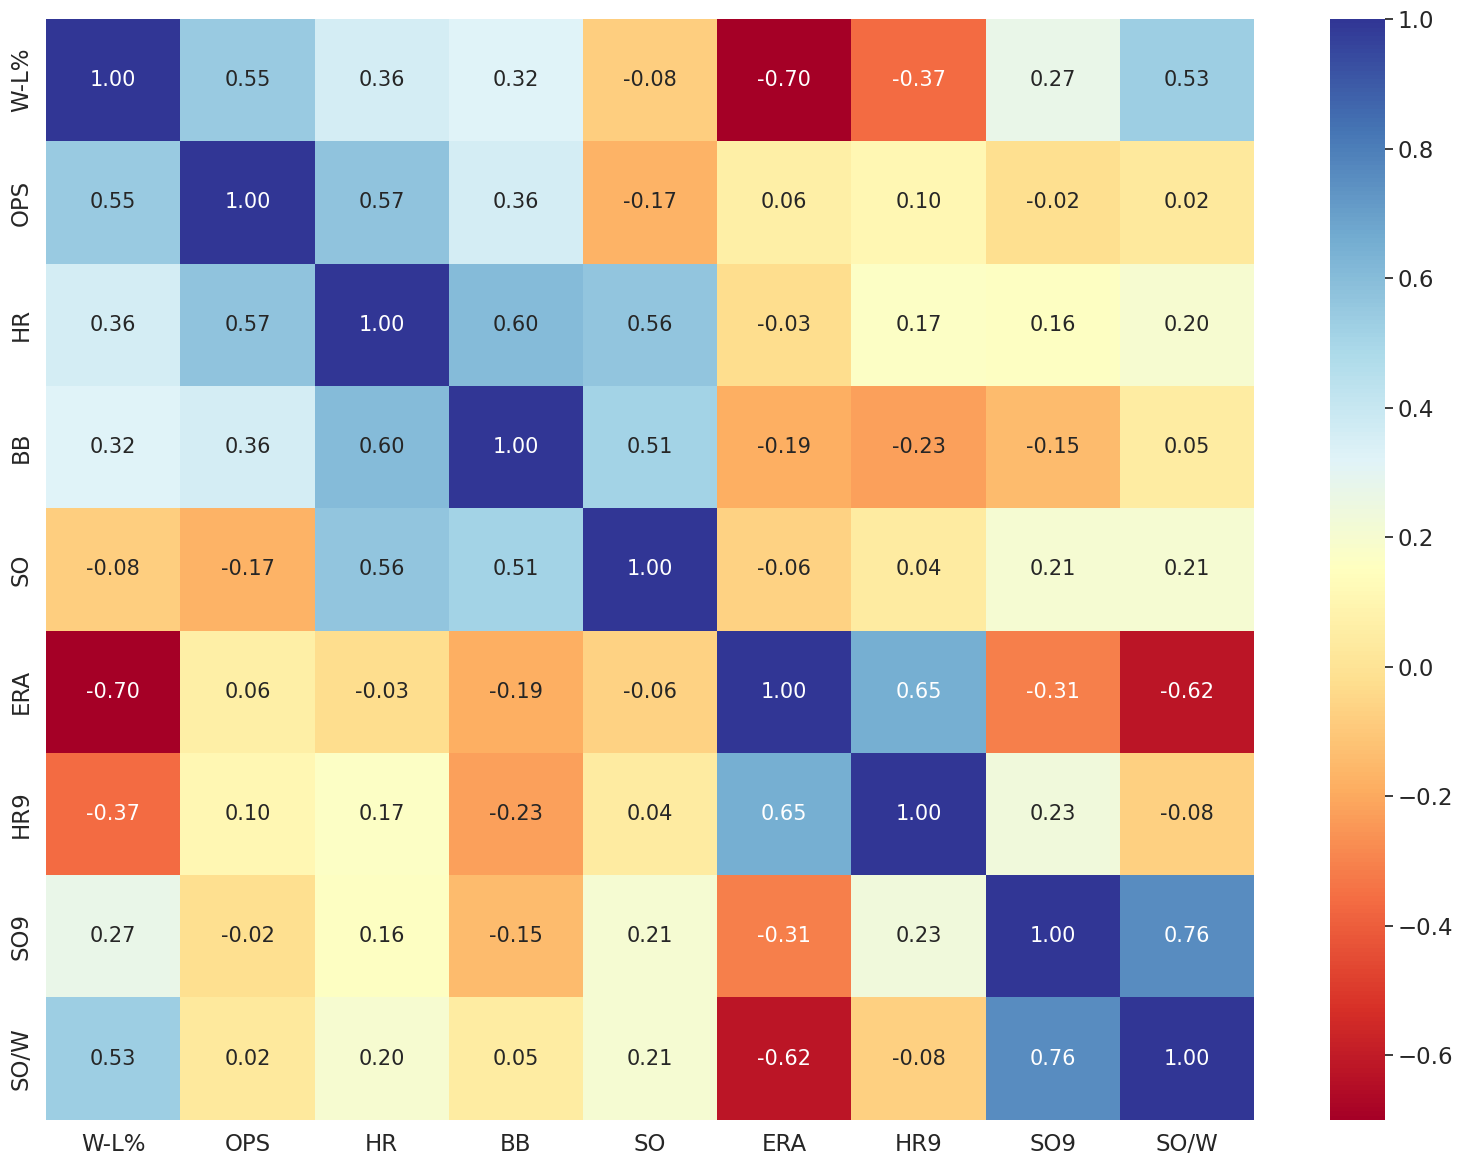

In [64]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca()
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size': 15},
                      yticklabels=cols, xticklabels=cols, ax=ax, cmap="RdYlBu")
plt.tight_layout()
plt.show()

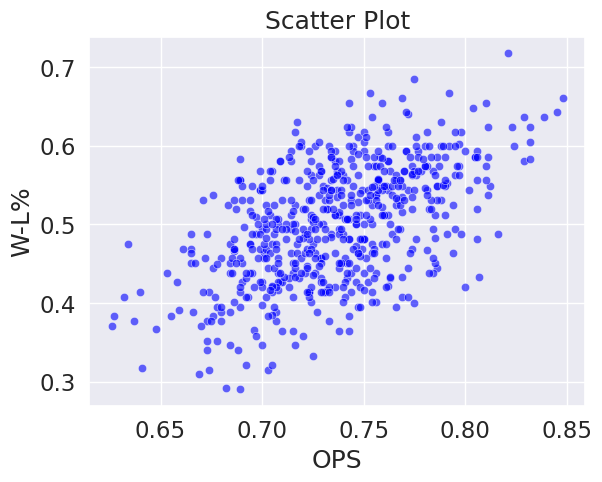

In [65]:
sns.scatterplot(data=df, x='OPS', y='W-L%', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

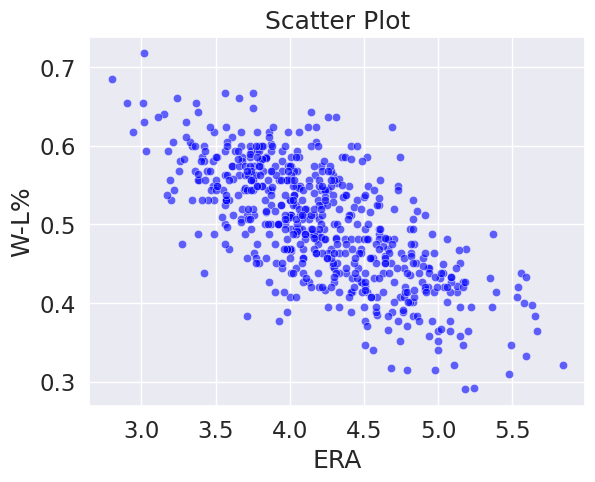

In [66]:
sns.scatterplot(data=df, x='ERA', y='W-L%', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [67]:
df['Tm'].value_counts()

Tm
Arizona Diamondbacks             20
San Francisco Giants             20
Toronto Blue Jays                20
Texas Rangers                    20
Seattle Mariners                 20
Oakland Athletics                20
New York Yankees                 20
Minnesota Twins                  20
Kansas City Royals               20
Detroit Tigers                   20
Chicago White Sox                20
Atlanta Braves                   20
Baltimore Orioles                20
St. Louis Cardinals              20
Boston Red Sox                   20
San Diego Padres                 20
Pittsburgh Pirates               20
Philadelphia Phillies            20
New York Mets                    20
Milwaukee Brewers                20
Los Angeles Dodgers              20
Houston Astros                   20
Colorado Rockies                 20
Cincinnati Reds                  20
Chicago Cubs                     20
Washington Nationals             19
Cleveland Indians                18
Tampa Bay Rays           

<Axes: >

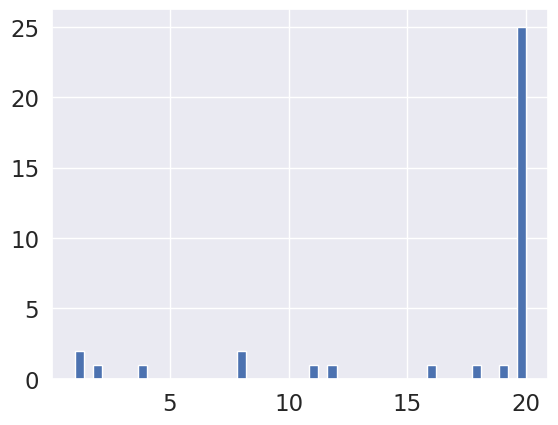

In [68]:
df['Tm'].value_counts().hist(bins=50)

<Axes: xlabel='W-L%', ylabel='Tm'>

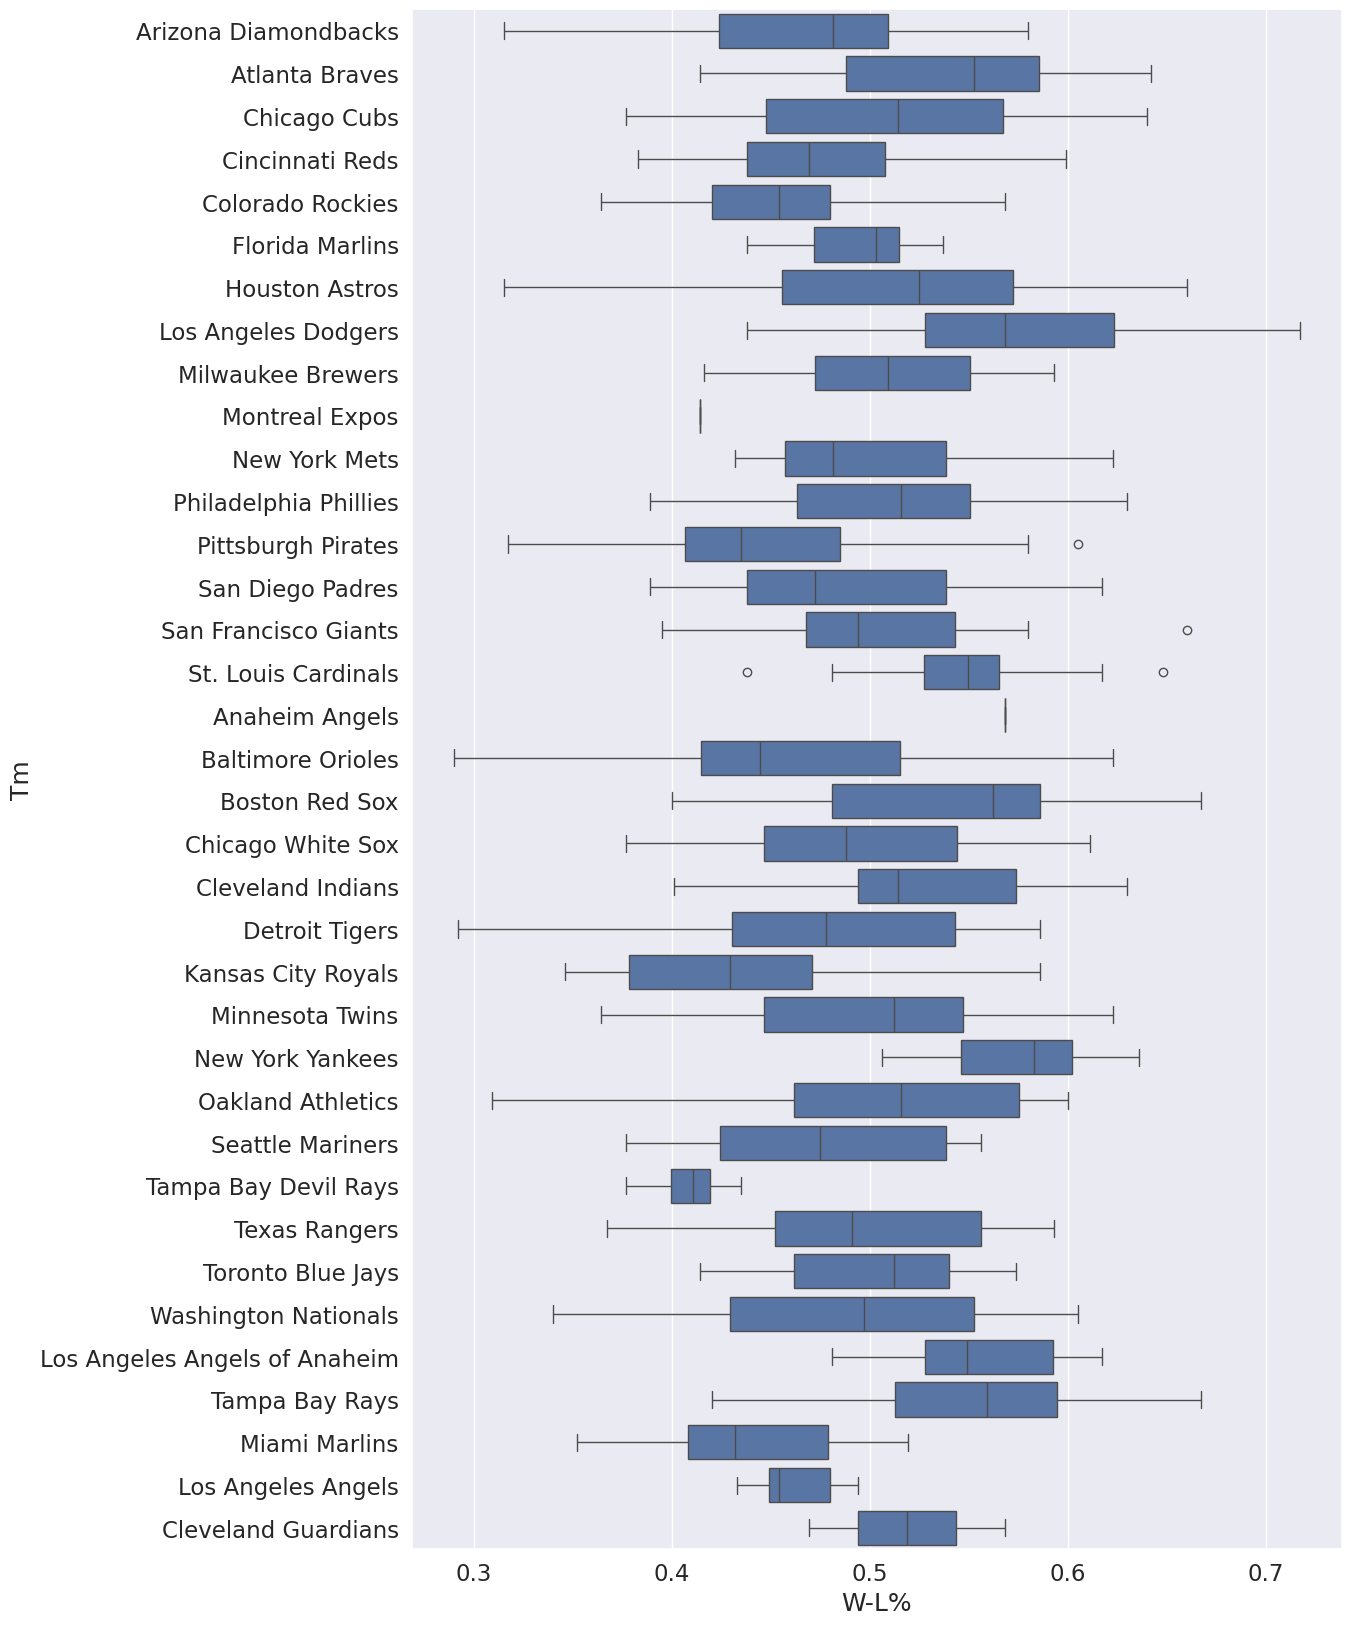

In [25]:
fig = plt.figure(figsize=(12, 20))
sns.boxplot(x='W-L%', y='Tm', data=df)

<Axes: xlabel='OPS', ylabel='Tm'>

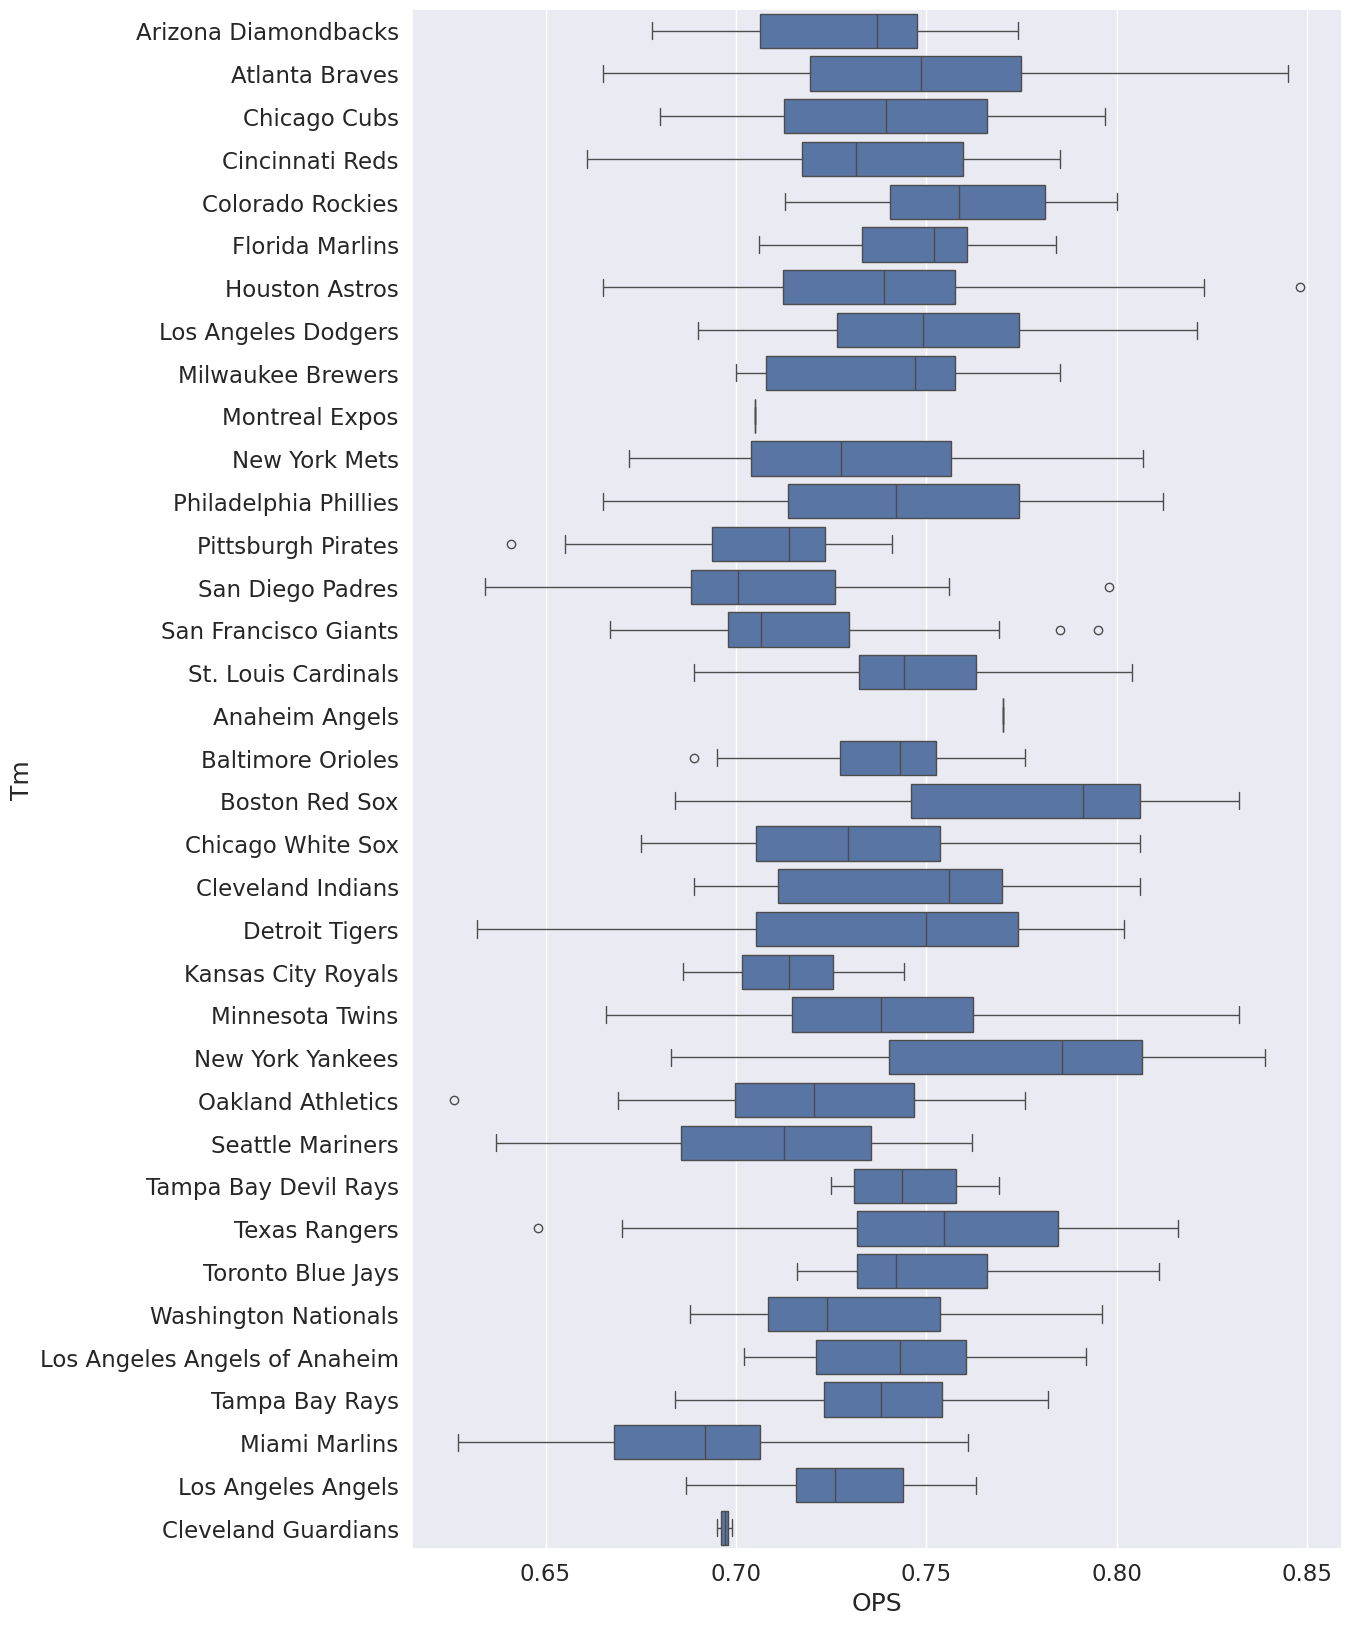

In [26]:
fig = plt.figure(figsize=(12, 20))
sns.boxplot(x='OPS', y='Tm', data=df)

In [69]:
df.head()

,Year,Tm,HR,BB,SO,OPS,W-L%,ERA,H9,HR9,SO9,SO/W
0,2004,Arizona Diamondbacks,135,441,1022,0.703,0.315,4.98,9.3,1.2,7.2,1.73
1,2004,Atlanta Braves,178,587,1158,0.777,0.593,3.74,9.2,1.0,6.4,1.96
2,2004,Chicago Cubs,235,489,1080,0.786,0.549,3.81,8.4,1.0,8.3,2.47
3,2004,Cincinnati Reds,194,599,1335,0.749,0.469,5.19,9.9,1.5,6.2,1.73
4,2004,Colorado Rockies,202,568,1181,0.800,0.420,5.54,10.2,1.2,5.9,1.36


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    600 non-null    int64  
 1   Tm      600 non-null    object 
 2   HR      600 non-null    int64  
 3   BB      600 non-null    int64  
 4   SO      600 non-null    int64  
 5   OPS     600 non-null    float64
 6   W-L%    600 non-null    float64
 7   ERA     600 non-null    float64
 8   H9      600 non-null    float64
 9   HR9     600 non-null    float64
 10  SO9     600 non-null    float64
 11  SO/W    600 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 56.4+ KB


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 분산 1
scale_columns = ['OPS', 'HR', 'BB', 'SO', 'ERA', 'HR9', 'SO9', 'SO/W']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [30]:
df.head()

,Year,Tm,HR,BB,SO,OPS,W-L%,ERA,H9,HR9,SO9,SO/W
0,2004,Arizona Diamondbacks,-0.816226,-0.620056,-0.736725,-0.858999,0.315,1.435216,9.3,0.485983,-0.468754,-1.446108
1,2004,Atlanta Braves,0.186900,0.931589,-0.135016,1.060745,0.593,-0.864443,9.2,-0.514325,-1.218511,-0.969722
2,2004,Chicago Cubs,1.516626,-0.109926,-0.480114,1.294228,0.549,-0.734624,8.4,-0.514325,0.562161,0.086612
3,2004,Cincinnati Reds,0.560157,1.059121,0.648091,0.334355,0.469,1.824675,9.9,1.986447,-1.405950,-1.446108
4,2004,Colorado Rockies,0.746785,0.729663,-0.033256,1.657422,0.420,2.473772,10.2,0.485983,-1.687109,-2.212468


In [31]:
df[scale_columns].head()

,OPS,HR,BB,SO,ERA,HR9,SO9,SO/W
0,-0.858999,-0.816226,-0.620056,-0.736725,1.435216,0.485983,-0.468754,-1.446108
1,1.060745,0.186900,0.931589,-0.135016,-0.864443,-0.514325,-1.218511,-0.969722
2,1.294228,1.516626,-0.109926,-0.480114,-0.734624,-0.514325,0.562161,0.086612
3,0.334355,0.560157,1.059121,0.648091,1.824675,1.986447,-1.405950,-1.446108
4,1.657422,0.746785,0.729663,-0.033256,2.473772,0.485983,-1.687109,-2.212468


In [71]:
df[numerical_columns].head()

,OPS,HR,BB,SO,ERA,HR9,SO9,SO/W
0,-0.858999,-0.816226,-0.620056,-0.736725,1.435216,0.485983,-0.468754,-1.446108
1,1.060745,0.186900,0.931589,-0.135016,-0.864443,-0.514325,-1.218511,-0.969722
2,1.294228,1.516626,-0.109926,-0.480114,-0.734624,-0.514325,0.562161,0.086612
3,0.334355,0.560157,1.059121,0.648091,1.824675,1.986447,-1.405950,-1.446108
4,1.657422,0.746785,0.729663,-0.033256,2.473772,0.485983,-1.687109,-2.212468


In [72]:
from sklearn.model_selection import train_test_split


X = df[numerical_columns]
y = df['W-L%']


train_indices = df['Year'] < 2020
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[~train_indices], y[~train_indices]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,OPS,4.5
1,HR,4.2
2,BB,1.7
3,SO,2.3
4,ERA,4.2
5,HR9,3.0
6,SO9,3.4
7,SO/W,4.1


In [35]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [36]:
print(lr.coef_)

[ 0.04277044  0.00439353  0.00158718 -0.0057617  -0.05507085  0.00222456
 -0.00174441  0.00484516]


In [37]:
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,OPS,0.042770
1,HR,0.004394
2,BB,0.001587
3,SO,-0.005762
4,ERA,-0.055071
5,HR9,0.002225
6,SO9,-0.001744
7,SO/W,0.004845


In [38]:
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
4,ERA,-0.055071
0,OPS,0.042770
3,SO,-0.005762
7,SO/W,0.004845
1,HR,0.004394
5,HR9,0.002225
6,SO9,-0.001744
2,BB,0.001587


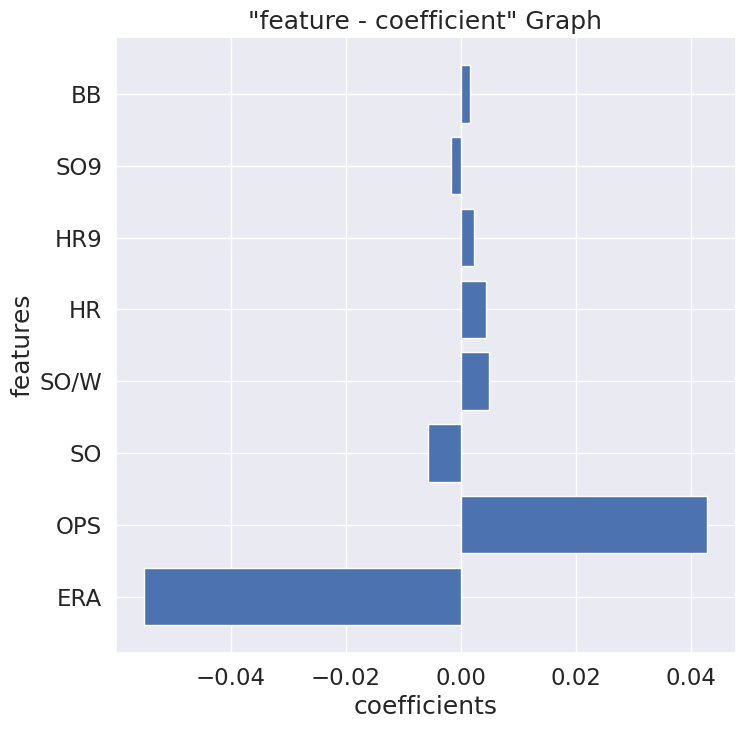

In [47]:
### figure size
plt.figure(figsize = (8, 8))

### bar plot
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [46]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   W-L%   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     347.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          4.65e-192
Time:                        21:53:15   Log-Likelihood:                 1051.1
No. Observations:                 480   AIC:                            -2084.
Df Residuals:                     471   BIC:                            -2047.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4964      0.001    354.740      0.000       0.494       0.499
OPS            0.0428      0.003     15.741      0.000       0.037       0.048
HR             0.0044      0.003      1.506      0.133      -0.001       0.010
BB             0.0016      0.002      0.707      0.480      -0.003       0.006
SO            -0.0058      0.003     -2.145      0.032      -0.011      -0.000
ERA           -0.0551      0.003    -20.729      0.000      -0.060      -0.050
HR9            0.0022      0.002      0.985      0.325      -0.002       0.007
SO9           -0.0017      0.003     -0.676      0.499      -0.007       0.003
SO/W           0.0048      0.003      1.852      0.065      -0.000       0.010
==============================================================================
Omnibus:                        0.604   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.539
Skew:                           0.082   Prob(JB):                        0.764
Kurtosis:                       3.017   Cond. No.                         5.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_train2

,const,OPS,HR,BB,SO,ERA,HR9,SO9,SO/W
0,1.0,-0.858999,-0.816226,-0.620056,-0.736725,1.435216,0.485983,-0.468754,-1.446108
1,1.0,1.060745,0.186900,0.931589,-0.135016,-0.864443,-0.514325,-1.218511,-0.969722
2,1.0,1.294228,1.516626,-0.109926,-0.480114,-0.734624,-0.514325,0.562161,0.086612
3,1.0,0.334355,0.560157,1.059121,0.648091,1.824675,1.986447,-1.405950,-1.446108
4,1.0,1.657422,0.746785,0.729663,-0.033256,2.473772,0.485983,-1.687109,-2.212468
...,...,...,...,...,...,...,...,...,...
475,1.0,1.034803,2.029854,0.835940,0.661364,-0.437893,0.485983,0.281003,0.604423
476,1.0,0.100873,1.609941,0.942217,1.736478,1.453762,2.486601,-0.000156,0.045188
477,1.0,0.541895,1.096713,0.453342,1.347136,-1.031354,-0.014171,2.061674,2.385693
478,1.0,0.360298,1.236684,0.368321,1.723205,1.583581,1.986447,0.843320,-0.120512


In [42]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,0.309,0.280953
1,0.317,0.340230
2,0.321,0.293907
3,0.321,0.348158
4,0.340,0.359627


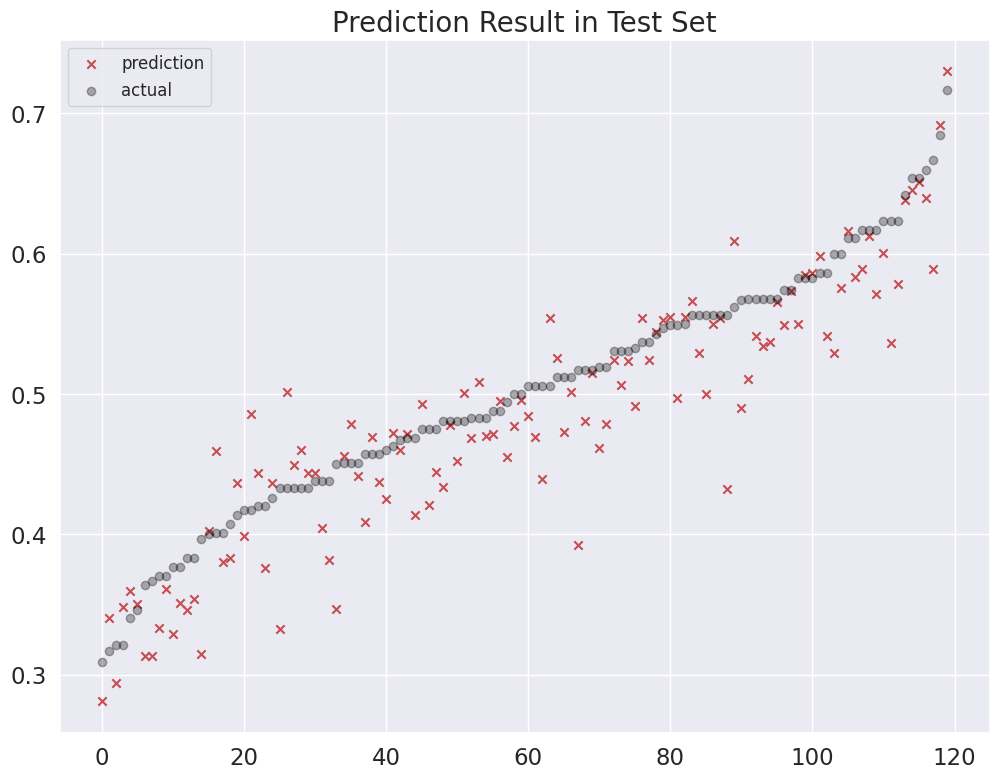

In [43]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [44]:
### R squared
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.8549717874502846
0.7954150833877554


In [45]:
### RMSE(Root Mean Squared Eror)
from sklearn.metrics import mean_squared_error
from math import sqrt

### training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

### test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.0270848137007722
0.039375840212942166
